# Notebook Summary

* This notebook covers data augmentation using ImageDataGenerator

* It covers a Binary Classification model same as previous notebook.

* In the end there are functions which preprocess the an image to provide any image to the model and give prediction as class name ( for user-friendly experience).

In [ ]:
# Imporating all the necessary libraries
import zipfile
from google.colab import drive
import os
import random
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten


In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/My\ Drive/Colab\ Notebooks/CNN/pizza_steak.zip

Archive:  gdrive/My Drive/Colab Notebooks/CNN/pizza_steak.zip
   creating: pizza_steak/
  inflating: __MACOSX/._pizza_steak  
  inflating: pizza_steak/.DS_Store   
  inflating: __MACOSX/pizza_steak/._.DS_Store  
   creating: pizza_steak/test/
  inflating: __MACOSX/pizza_steak/._test  
   creating: pizza_steak/train/
  inflating: __MACOSX/pizza_steak/._train  
  inflating: pizza_steak/test/.DS_Store  
  inflating: __MACOSX/pizza_steak/test/._.DS_Store  
   creating: pizza_steak/test/steak/
  inflating: __MACOSX/pizza_steak/test/._steak  
   creating: pizza_steak/test/pizza/
  inflating: __MACOSX/pizza_steak/test/._pizza  
  inflating: pizza_steak/train/.DS_Store  
  inflating: __MACOSX/pizza_steak/train/._.DS_Store  
   creating: pizza_steak/train/steak/
  inflating: __MACOSX/pizza_steak/train/._steak  
   creating: pizza_steak/train/pizza/
  inflating: __MACOSX/pizza_steak/train/._pizza  
  inflating: pizza_steak/test/steak/413497.jpg  
  inflating: pizza_steak/test/steak/2246332.jpg  

In [ ]:
class_names = ["pizza","steak"]

In [ ]:
# See random image

def view_random_image(target_dir,target_class):
  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  img = mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Shape of the image is : {img.shape}")

  return img

['2019441.jpg']
Shape of the image is : (512, 512, 3)


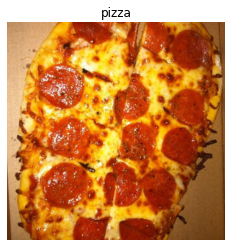

In [ ]:
img = view_random_image(target_dir ="pizza_steak/train/",
                        target_class = "pizza")

### Data Augmentation

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Augmented data instance
train_datagen_aug = ImageDataGenerator(rescale = 1/255.,
                                       rotation_range = 0.2,
                                       shear_range = 0.2,
                                       width_shift_range = 0.2,
                                       height_shift_range = 0.3,
                                       horizontal_flip = True)

# Non-augmentated data instance
train_datagen = ImageDataGenerator(rescale = 1/255.,
                                   rotation_range = 0.2,
                                   shear_range = 0.2,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.3,
                                   horizontal_flip = True)

# test data instance
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [ ]:
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

In [ ]:
train_data_aug = train_datagen_aug.flow_from_directory(train_dir,
                                                       target_size = (224,224),
                                                       batch_size = 32,
                                                       class_mode = "binary",
                                                       shuffle = True)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = "binary",
                                               shuffle = True)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = "binary",
                                             shuffle = True)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Visualizaing augmented images

(-0.5, 223.5, 223.5, -0.5)

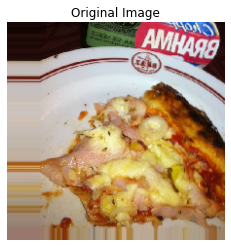

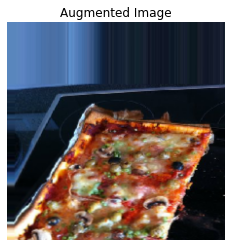

In [ ]:
images,labels = train_data.next()
aug_images,aug_labels = train_data_aug.next()

random_number = random.randint(0,32)

plt.imshow(images[random_number])
plt.title("Original Image")
plt.axis("off")
plt.figure()
plt.imshow(aug_images[random_number])
plt.title("Augmented Image")
plt.axis("off")

In [ ]:
# Building the model

tf.random.set_seed(42)

# Making the model
model = tf.keras.Sequential([
                             
    Conv2D(filters = 10,
           kernel_size = 3,
           activation = "relu",
           input_shape = (224,224,3))  ,

    Conv2D(10,3,activation = "relu"),

    MaxPool2D(pool_size = 2,
              padding = "valid"),

    Conv2D(10,3,activation="relu"),

    Conv2D(10,3,activation="relu"), 

    MaxPool2D(2),

    Flatten(),

    Dense(1,activation = "sigmoid")
])

In [ ]:
# Compiling
model.compile(loss = "binary_crossentropy",
              optimizer = "Adam",
              metrics = ["accuracy"])

In [ ]:
# Fitting

history = model.fit(train_data,
                    epochs = 5,
                    steps_per_epoch = len(train_data),
                  
                    validation_data = test_data,
                    validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 55s 471ms/step - loss: 0.6588 - accuracy: 0.5891 - val_loss: 0.5413 - val_accuracy: 0.7440
Epoch 2/5
47/47 [==============================] - 22s 466ms/step - loss: 0.5807 - accuracy: 0.6888 - val_loss: 0.3795 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 22s 464ms/step - loss: 0.5477 - accuracy: 0.7356 - val_loss: 0.3820 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 22s 463ms/step - loss: 0.4951 - accuracy: 0.7514 - val_loss: 0.3476 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 22s 468ms/step - loss: 0.4539 - accuracy: 0.7814 - val_loss: 0.4084 - val_accuracy: 0.8060


In [ ]:
# Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

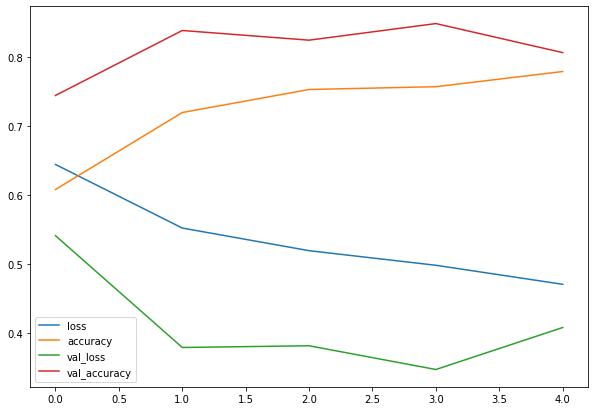

In [ ]:
# Plotting loss and accuracy curves for train and validation data

import pandas as pd

import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize = (10,7))

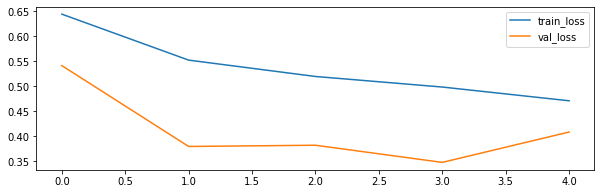

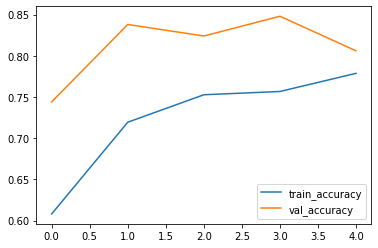

In [ ]:
# Plotting seperately

train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

train_accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

no_of_epochs = range(len(history.history["loss"]))

plt.figure(figsize = (10,3))

plt.plot(no_of_epochs,train_loss,label = "train_loss")
plt.plot(no_of_epochs,val_loss,label = "val_loss")
plt.legend()

plt.figure()

plt.plot(no_of_epochs,train_accuracy,label = "train_accuracy")
plt.plot(no_of_epochs,val_accuracy,label = "val_accuracy")
plt.legend()

In [ ]:
# Functions to load custom images preprocess them and predict the class.

def load_and_process(file_name , img_shape = 224):

  # Read the image

  img = tf.io.read_file(file_name)

  # Decode into a tensor

  img = tf.image.decode_image(img)

  # Reshape image

  img = tf.image.resize(img , size = [img_shape,img_shape])

  # rescale
 
  img = img/255.0

  return img


def predict_and_plot(model,file_name,class_names = class_names):

  img = load_and_process(file_name)

  pred = model.predict(tf.expand_dims(img,axis = 0))

  pred_class = class_names[int(tf.round(pred))]

  plt.imshow(img)

  plt.title(f"Predicted class :- {pred_class}")

  plt.axis("off")  

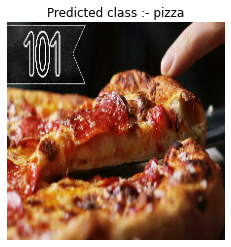

In [ ]:
predict_and_plot(model,"pizza555.jpg")

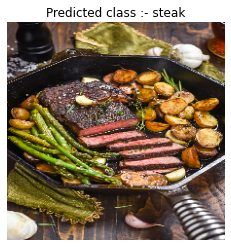

In [ ]:
#predict_and_plot(model,"steak222.jpg")

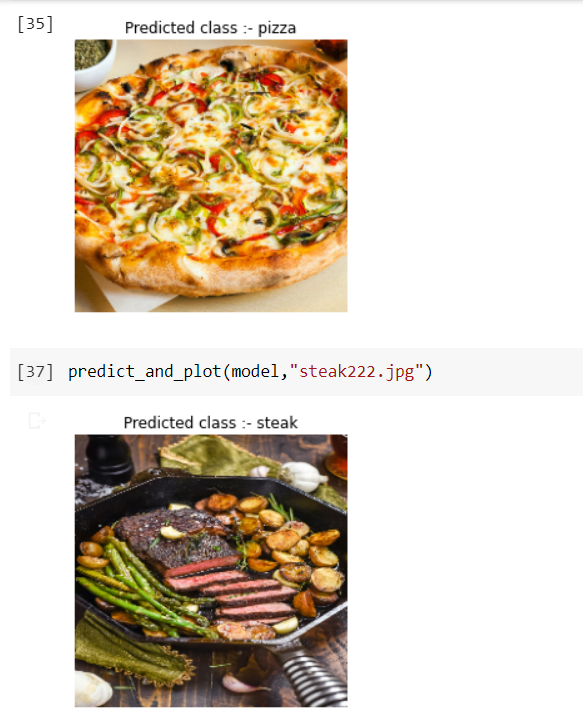